# Linear Regresion:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_set =pd.read_csv("Salary Data.csv")
data_set.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
data_set[data_set.duplicated()].shape

(50, 6)

In [5]:
data_set1=data_set.drop_duplicates()


In [6]:
data_set1.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [7]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)



Text(0.5, 1.0, ' Age vs Salary')

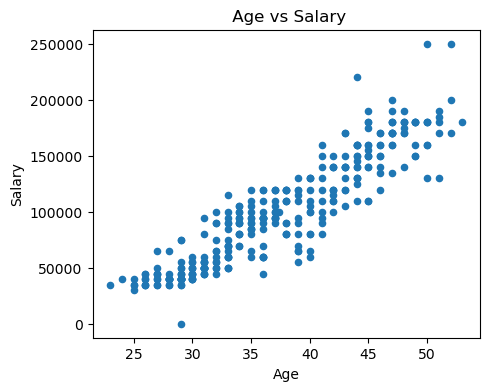

In [8]:
data_set1.plot(kind = 'scatter', x = 'Age', y = 'Salary' , figsize=(5, 4)) 
plt.title(' Age vs Salary')

Text(0.5, 1.0, ' Years of Experience vs Salary')

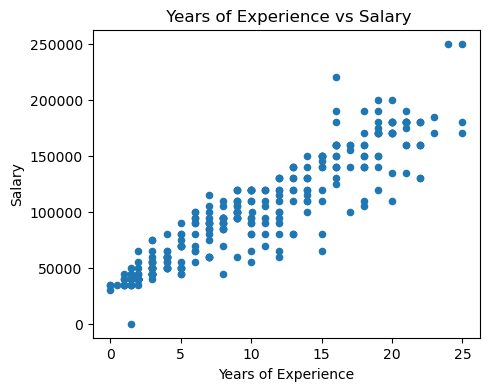

In [9]:
data_set1.plot(kind='scatter', x='Years of Experience', y='Salary', figsize=(5, 4)) 
plt.title(' Years of Experience vs Salary')

In [10]:
data_set1['Education Level'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Education Level, dtype: int64

In [11]:
data_set1['Gender'].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

In [12]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [13]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.751388,1,0,1.478511,-0.762996,90000.0
1,-1.309758,0,1,-1.530144,-1.064656,65000.0
2,1.063317,1,2,0.864067,0.745306,150000.0
3,-0.193017,0,0,0.249624,-0.461335,60000.0
4,2.040466,1,1,-1.424205,1.499456,200000.0


In [15]:
X=data_set1[["Age","Gender","Education Level","Job Title","Years of Experience"]]
y=data_set1[["Salary"]]

In [17]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score ,r2_score

kf = KFold(n_splits=4, shuffle=True, random_state=42)
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    
    y_pred = linear_model.predict(X_test)
    
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)



In [18]:
from sklearn.metrics import accuracy_score ,r2_score
avg_r2_score = np.mean(r2_scores)
print("Average R2 Score is {0:.2f}% :". format( 100*avg_r2_score))

Average R2 Score is 88.45% :


Text(0.5, 1.0, 'Predicted vs Actual Salary (Linear Regression)')

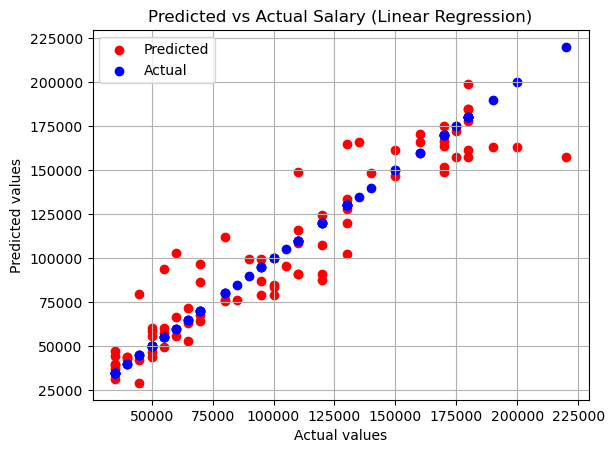

In [19]:
plt.scatter(y_test, y_pred, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='blue', label='Actual')

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.grid(True)
plt.legend()
plt.title('Predicted vs Actual Salary (Linear Regression)')



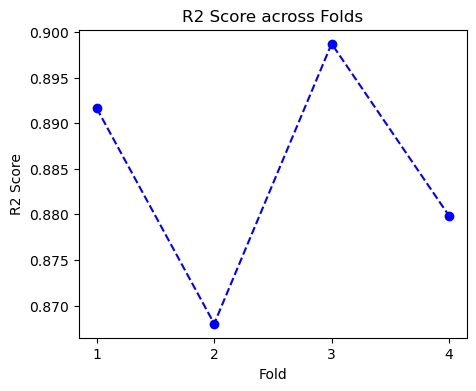

In [20]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 5), r2_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('R2 Score across Folds')
plt.xticks(np.arange(1, 5))
plt.show()